# 투빅스 1주차 과제 (1) - 주제: EDA

<br>

***19기 윤세휘***


**데이터 출처: [Kaggle - IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download)**

**파이썬을 이용하여 전처리 및 EDA를 진행해주세요.**
- 결측치, 이상치 검토
- 유의미한 시각화 5개 이상
- 수치형 변수 간 상관관계 파악
- 파생변수 생성

#  0. EDA 준비

- Age                         : (수치형 - 이산형) 
- Attrition                   : (범주형 - 명목형)
- BusinessTravel              : (범주형 - 명목형)
- DailyRate                   : (수치형 - 이산형)
- Department                  : (범주형 - 명목형)
- DistanceFromHome            : (수치형 - 이산형)
- Education                   : (범주형 - 순서형)
- EducationField              : (범주형 - 명목형)
- EmployeeCount               : (수치형 - 이산형)
- EmployeeNumber              : (수치형 - 이산형)
- EnvironmentSatisfaction     : (범주형 - 순서형)
- Gender                      : (범주형 - 명목형)
- HourlyRate                  : (수치형 - 이산형)
- JobInvolvement              : (범주형 - 순서형)
- JobLevel                    : (범주형 - 순서형)
- JobRole                     : (범주형 - 명목형)
- JobSatisfaction             : (범주형 - 순서형)
- MaritalStatus               : (범주형 - 명목형)
- MonthlyIncome               : (수치형 - 이산형)
- MonthlyRate                 : (수치형 - 이산형)
- NumCompaniesWorked          : (수치형 - 이산형)
- Over18                      : (범주형 - 명목형)
- OverTime                    : (범주형 - 명목형)
- PercentSalaryHike           : (수치형 - 이산형)
- PerformanceRating           : (범주형 - 순서형)
- RelationshipSatisfaction    : (범주형 - 순서형)
- StandardHours               : (수치형 - 이산형)
- StockOptionLevel            : (범주형 - 순서형)
- TotalWorkingYears           : (수치형 - 이산형)
- TrainingTimesLastYear       : (수치형 - 이산형)
- WorkLifeBalance             : (범주형 - 순서형)
- YearsAtCompany              : (수치형 - 이산형)
- YearsInCurrentRole          : (수치형 - 이산형)
- YearsSinceLastPromotion     : (수치형 - 이산형)
- YearsWithCurrManager        : (수치형 - 이산형)


In [105]:
info_txt = '''- Age                         : (수치형 - 이산형) 
- Attrition                   : (범주형 - 명목형)
- BusinessTravel              : (범주형 - 명목형)
- DailyRate                   : (수치형 - 이산형)
- Department                  : (범주형 - 명목형)
- DistanceFromHome            : (수치형 - 이산형)
- Education                   : (범주형 - 순서형)
- EducationField              : (범주형 - 명목형)
- EmployeeCount               : (수치형 - 이산형)
- EmployeeNumber              : (수치형 - 이산형)
- EnvironmentSatisfaction     : (범주형 - 순서형)
- Gender                      : (범주형 - 명목형)
- HourlyRate                  : (수치형 - 이산형)
- JobInvolvement              : (범주형 - 순서형)
- JobLevel                    : (범주형 - 순서형)
- JobRole                     : (범주형 - 명목형)
- JobSatisfaction             : (범주형 - 순서형)
- MaritalStatus               : (범주형 - 명목형)
- MonthlyIncome               : (수치형 - 이산형)
- MonthlyRate                 : (수치형 - 이산형)
- NumCompaniesWorked          : (수치형 - 이산형)
- Over18                      : (범주형 - 명목형)
- OverTime                    : (범주형 - 명목형)
- PercentSalaryHike           : (수치형 - 이산형)
- PerformanceRating           : (범주형 - 순서형)
- RelationshipSatisfaction    : (범주형 - 순서형)
- StandardHours               : (수치형 - 이산형)
- StockOptionLevel            : (범주형 - 순서형)
- TotalWorkingYears           : (수치형 - 이산형)
- TrainingTimesLastYear       : (수치형 - 이산형)
- WorkLifeBalance             : (범주형 - 순서형)
- YearsAtCompany              : (수치형 - 이산형)
- YearsInCurrentRole          : (수치형 - 이산형)
- YearsSinceLastPromotion     : (수치형 - 이산형)
- YearsWithCurrManager        : (수치형 - 이산형)'''

info_list = info_txt.split('\n')

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import warnings

# 경고메세지 끄기
warnings.filterwarnings(action='ignore')

In [107]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 1. 결측치, 이상치 검토

In [108]:
data.info()     # 칼럼 dtype, null값 존재 확인
                # shape: (1470, 35)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [109]:
# 칼럼별 unique value와 value 종류 수 출력
for i in range(len(data.columns)):
    values = sorted(data[data.columns[i]].unique())
    n_values = data[data.columns[i]].nunique()
    print(info_list[i])
    if len(values) > 10:
        print('-', values[:5], '...', values[-5:])
        print('- ', n_values, '가지')
    else:
        print('-', values)
        print('- ', n_values, '가지')
        
    print()

- Age                         : (수치형 - 이산형) 
- [18, 19, 20, 21, 22] ... [56, 57, 58, 59, 60]
-  43 가지

- Attrition                   : (범주형 - 명목형)
- ['No', 'Yes']
-  2 가지

- BusinessTravel              : (범주형 - 명목형)
- ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
-  3 가지

- DailyRate                   : (수치형 - 이산형)
- [102, 103, 104, 105, 106] ... [1492, 1495, 1496, 1498, 1499]
-  886 가지

- Department                  : (범주형 - 명목형)
- ['Human Resources', 'Research & Development', 'Sales']
-  3 가지

- DistanceFromHome            : (수치형 - 이산형)
- [1, 2, 3, 4, 5] ... [25, 26, 27, 28, 29]
-  29 가지

- Education                   : (범주형 - 순서형)
- [1, 2, 3, 4, 5]
-  5 가지

- EducationField              : (범주형 - 명목형)
- ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
-  6 가지

- EmployeeCount               : (수치형 - 이산형)
- [1]
-  1 가지

- EmployeeNumber              : (수치형 - 이산형)
- [1, 2, 4, 5, 7] ... [2061, 2062, 2064, 2065, 2068]
-  1470 가지

- Environme

**단일값을 가지는 칼럼**
- EmployeeCount: 1
- Over18: 'Y'
- StandardHours: 80

In [110]:
# 단일값만을 가지는 칼럼 제거
data.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

In [73]:
# 연속형 데이터 칼럼
continuous_cols = list(set(data.columns) - {'Attrition', 'BusinessTravel', 'Department', 'EducationField', \
                                           'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'})

In [75]:
continuous_cols

['RelationshipSatisfaction',
 'EnvironmentSatisfaction',
 'TrainingTimesLastYear',
 'Age',
 'DailyRate',
 'YearsInCurrentRole',
 'PercentSalaryHike',
 'Education',
 'JobLevel',
 'DistanceFromHome',
 'YearsWithCurrManager',
 'EmployeeNumber',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsSinceLastPromotion',
 'JobSatisfaction',
 'JobInvolvement',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'HourlyRate',
 'MonthlyRate',
 'WorkLifeBalance',
 'YearsAtCompany',
 'StockOptionLevel']

In [74]:
def del_outlier(df, cols):
    for col in cols:
        print(col)
        Q1 = np.quantile(df[col], 0.25)
        Q3 = np.quantile(df[col], 0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR

        df = df[(df[col]>lower) & (df[col]<upper)]
    
    return df

del_outlier(data, numerical_cols)

RelationshipSatisfaction
EnvironmentSatisfaction
TrainingTimesLastYear
Age
DailyRate
YearsInCurrentRole
PercentSalaryHike
Education
JobLevel
DistanceFromHome
YearsWithCurrManager
EmployeeNumber
PerformanceRating
TotalWorkingYears


IndexError: cannot do a non-empty take from an empty axes.

# 2. 유의미한 시각화 5개 이상

### 범주형 변수 시각화

In [7]:
categorical_feats = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
print("범주형 변수 ", len(categorical_feats), "개 :", categorical_feats)

범주형 변수  16 개 : ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']


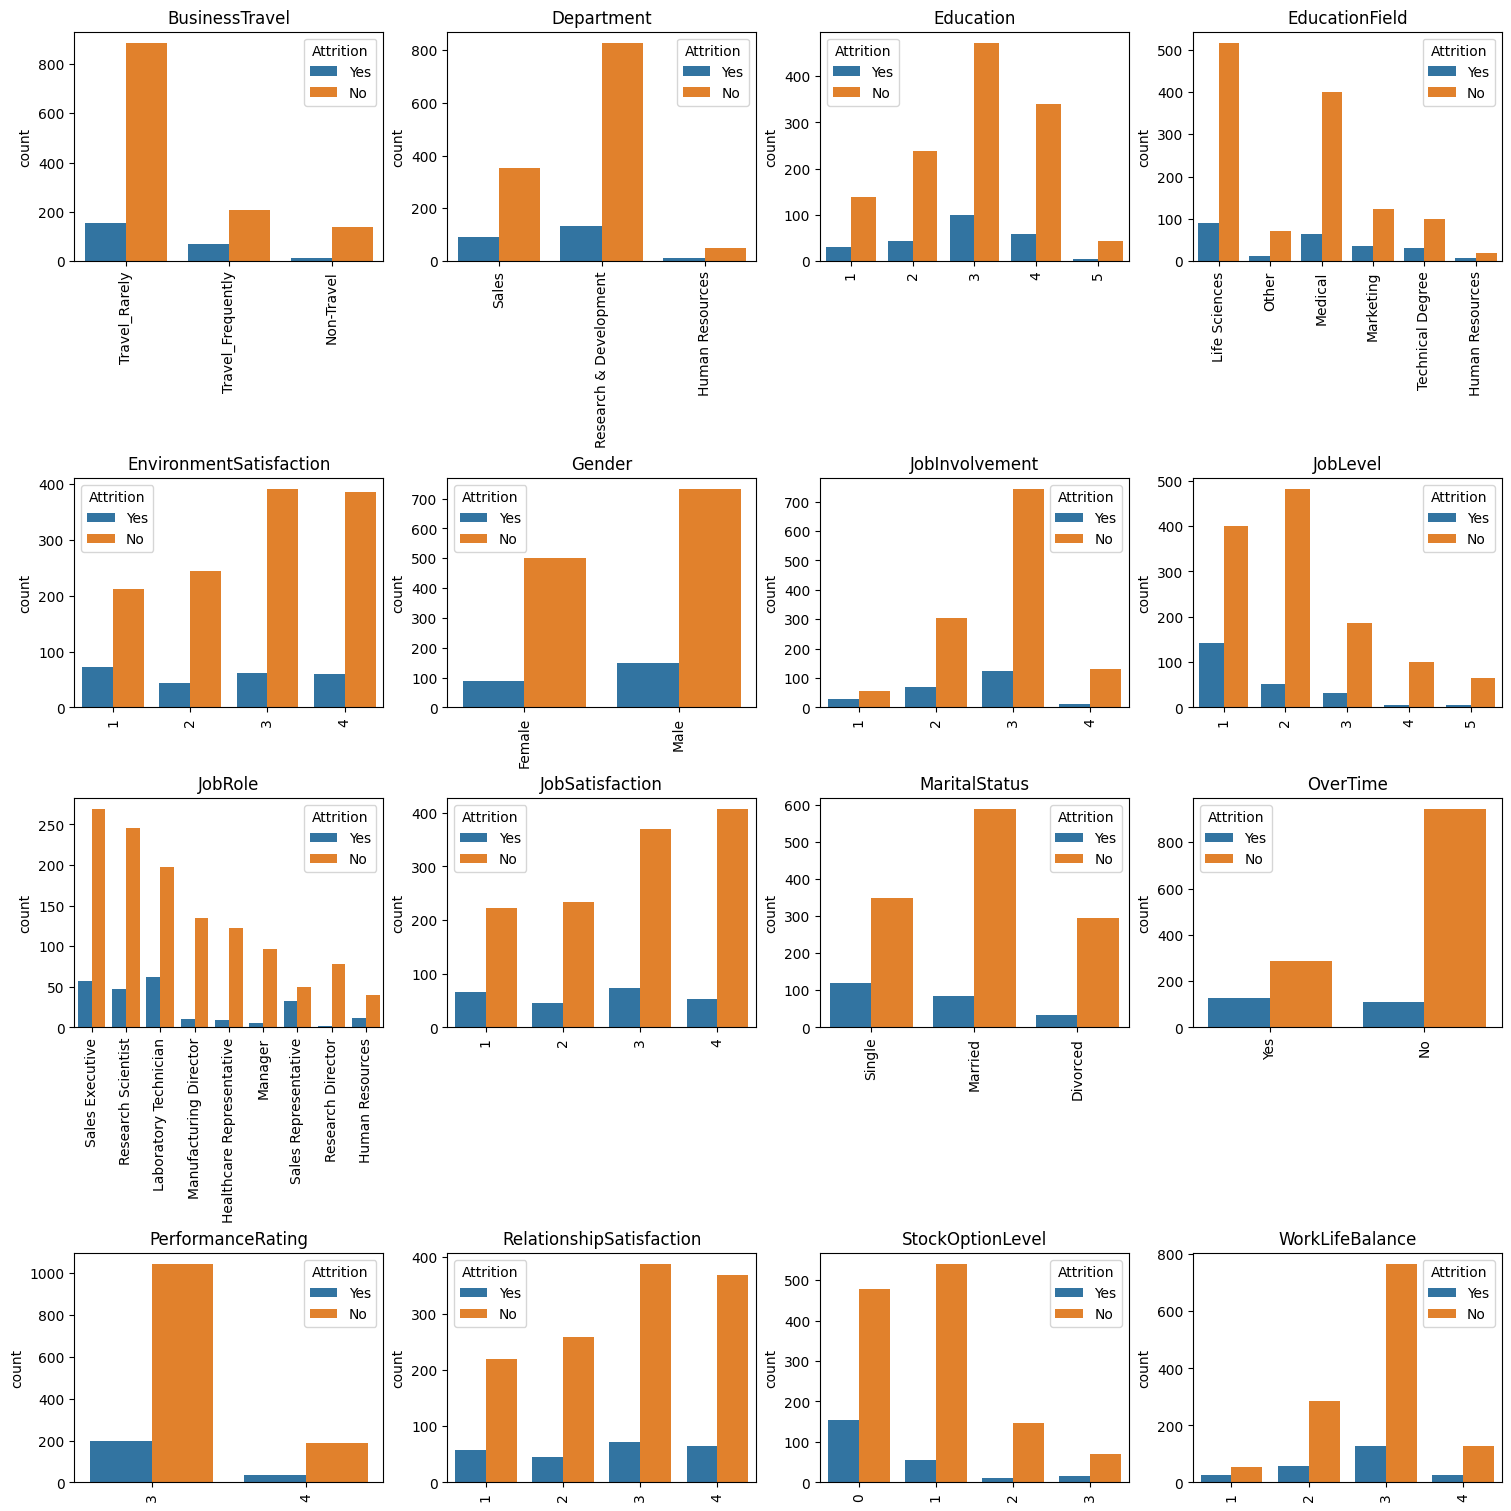

In [8]:
fig, ax = plt.subplots(4,4, figsize=(15,15), constrained_layout=True)
ax = ax.flatten()

for i in range(len(categorical_feats)):
    sns.countplot(x=data[categorical_feats[i]], data=data, hue='Attrition', ax=ax[i])
    ax[i].set_title(categorical_feats[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 90)
    ax[i].set(xlabel=None)
    

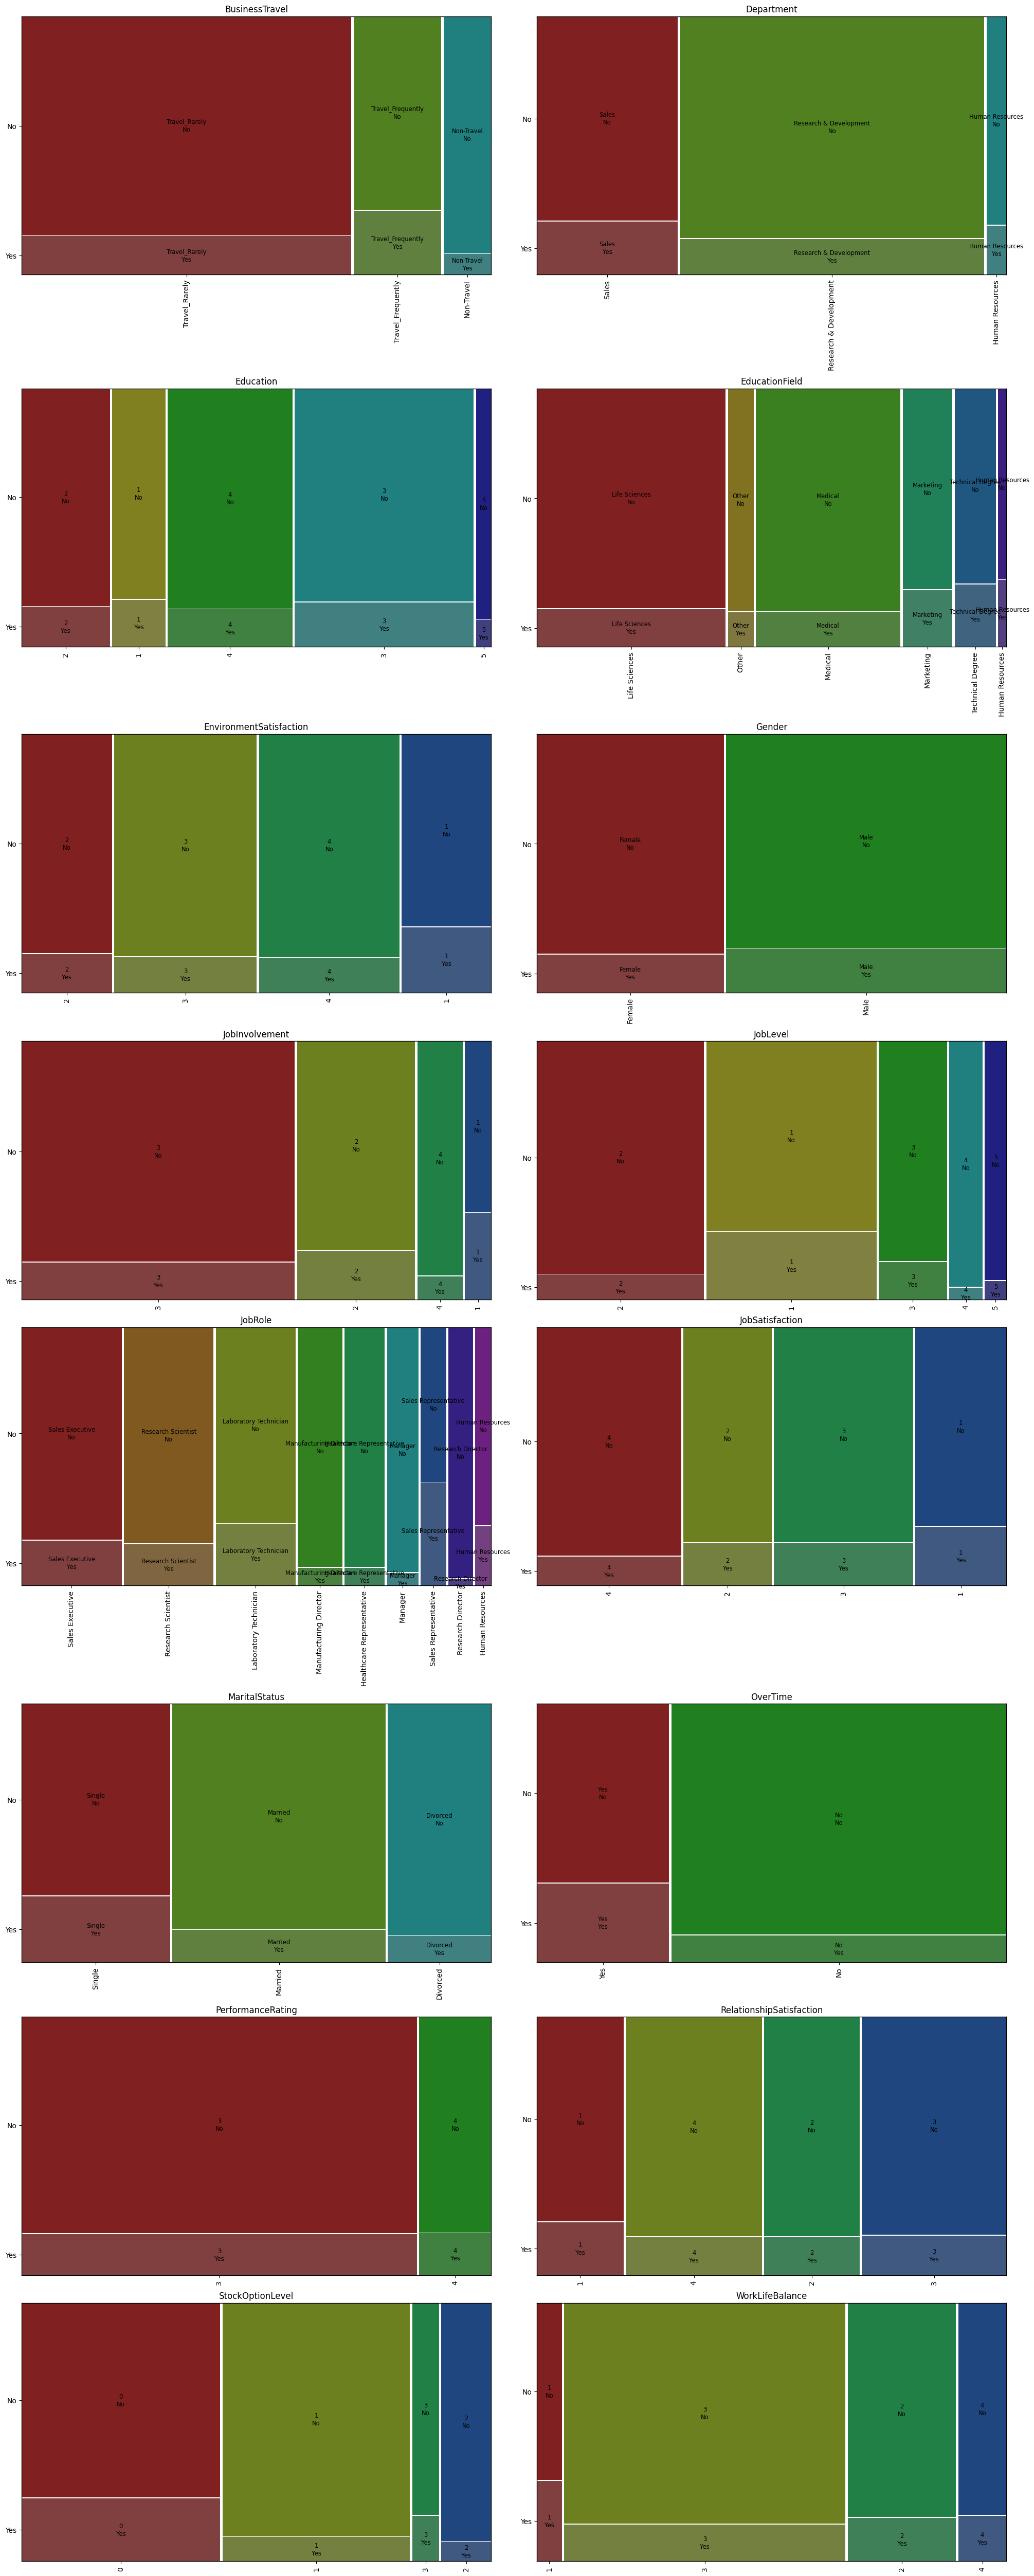

In [38]:
fig, ax = plt.subplots(8,2, figsize=(20,50), constrained_layout=True)
ax = ax.flatten()

for i in range(len(categorical_feats)):
    mosaic(data, [categorical_feats[i], 'Attrition'], ax=ax[i])
    ax[i].set_title(categorical_feats[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 90)
    ax[i].set(xlabel=None)


### 수치형 변수 시각화

In [51]:
numerical_feats = list(set(data.columns) - set(categorical_feats) - {'Attrition'})
print("수치형 변수 ", len(numerical_feats), "개 :", numerical_feats)

수치형 변수  15 개 : ['YearsWithCurrManager', 'MonthlyIncome', 'YearsAtCompany', 'TrainingTimesLastYear', 'EmployeeNumber', 'TotalWorkingYears', 'PercentSalaryHike', 'Age', 'DailyRate', 'YearsSinceLastPromotion', 'MonthlyRate', 'DistanceFromHome', 'NumCompaniesWorked', 'YearsInCurrentRole', 'HourlyRate']


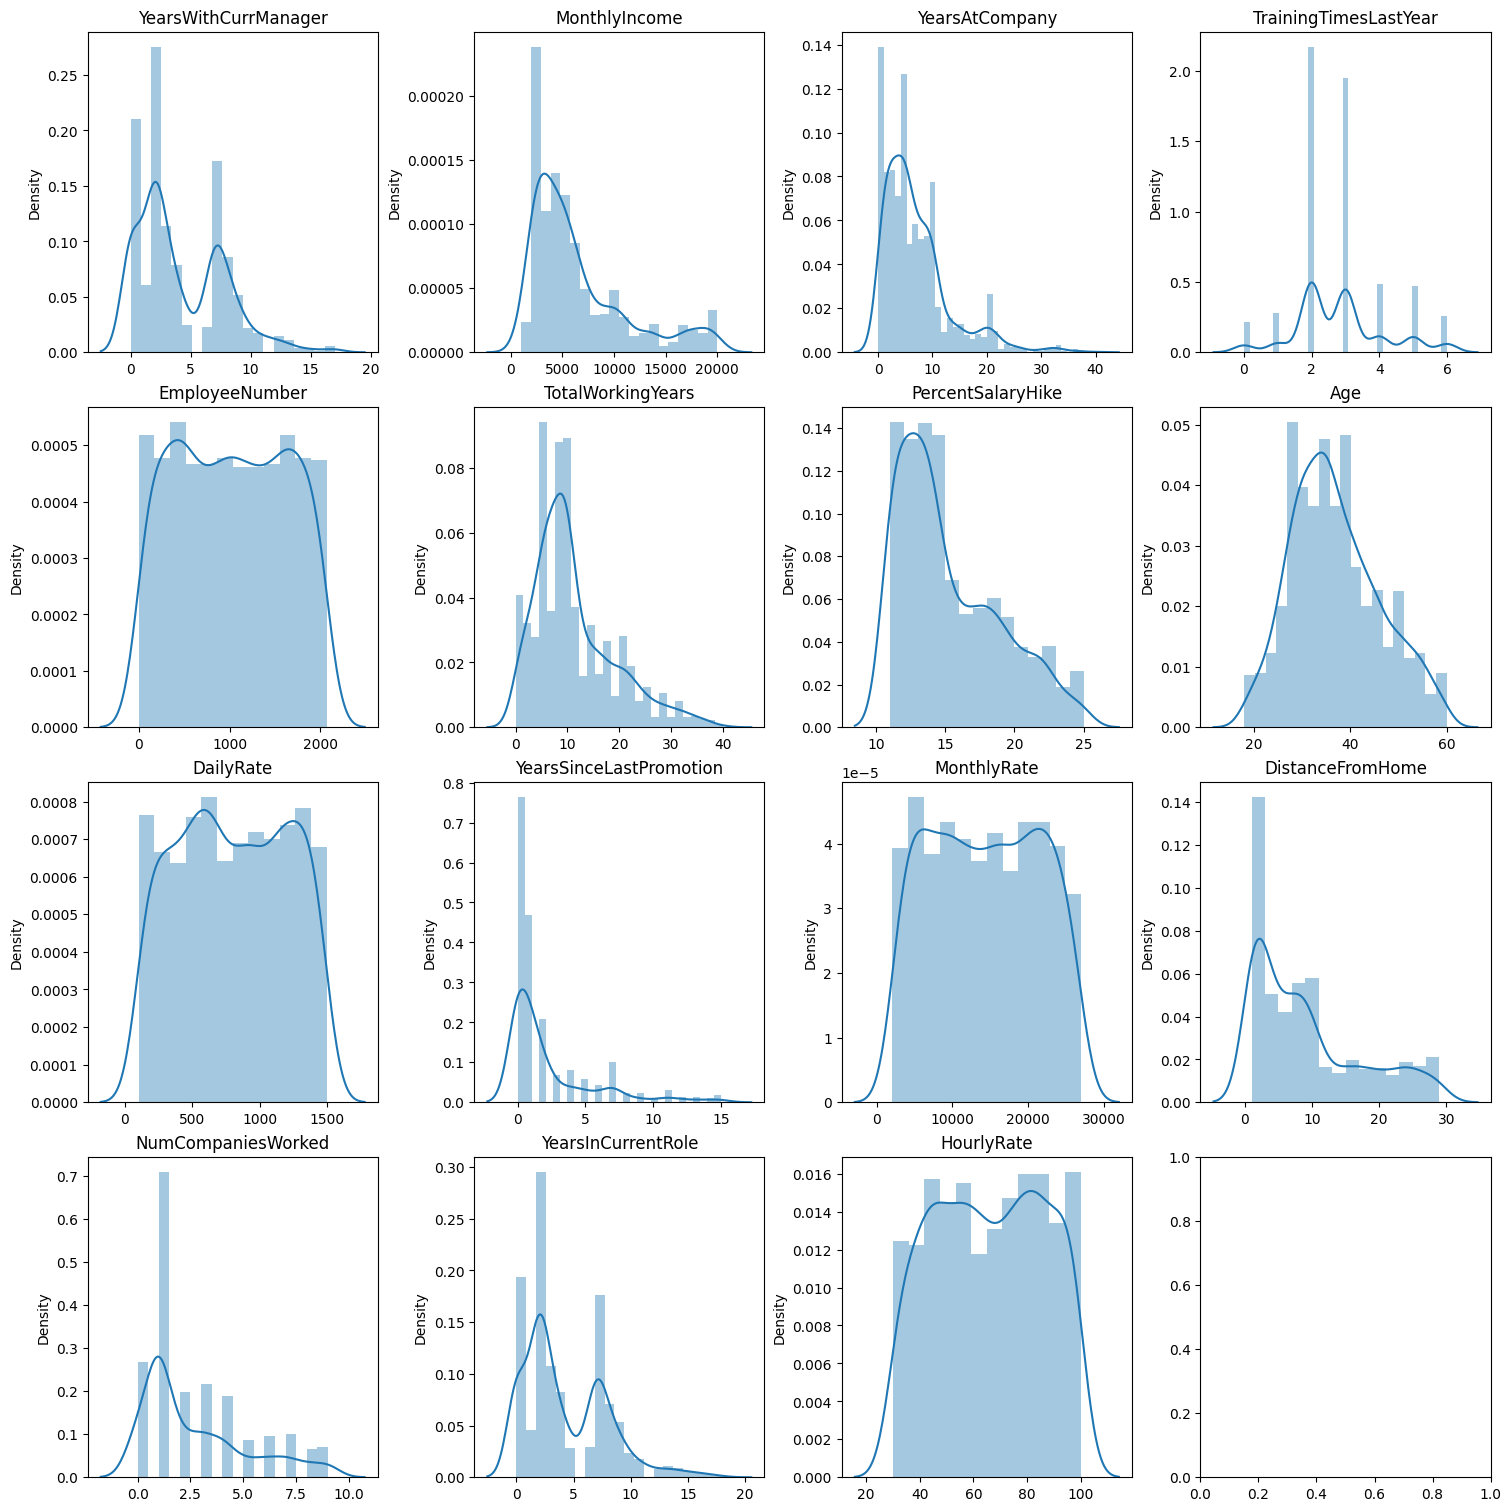

In [66]:
fig, ax = plt.subplots(4,4, figsize=(15,15), constrained_layout=True)
ax = ax.flatten()

for i in range(len(numerical_feats)):
    sns.distplot(data[numerical_feats[i]], ax=ax[i])
    ax[i].set_title(numerical_feats[i])
    ax[i].set(xlabel=None)
    

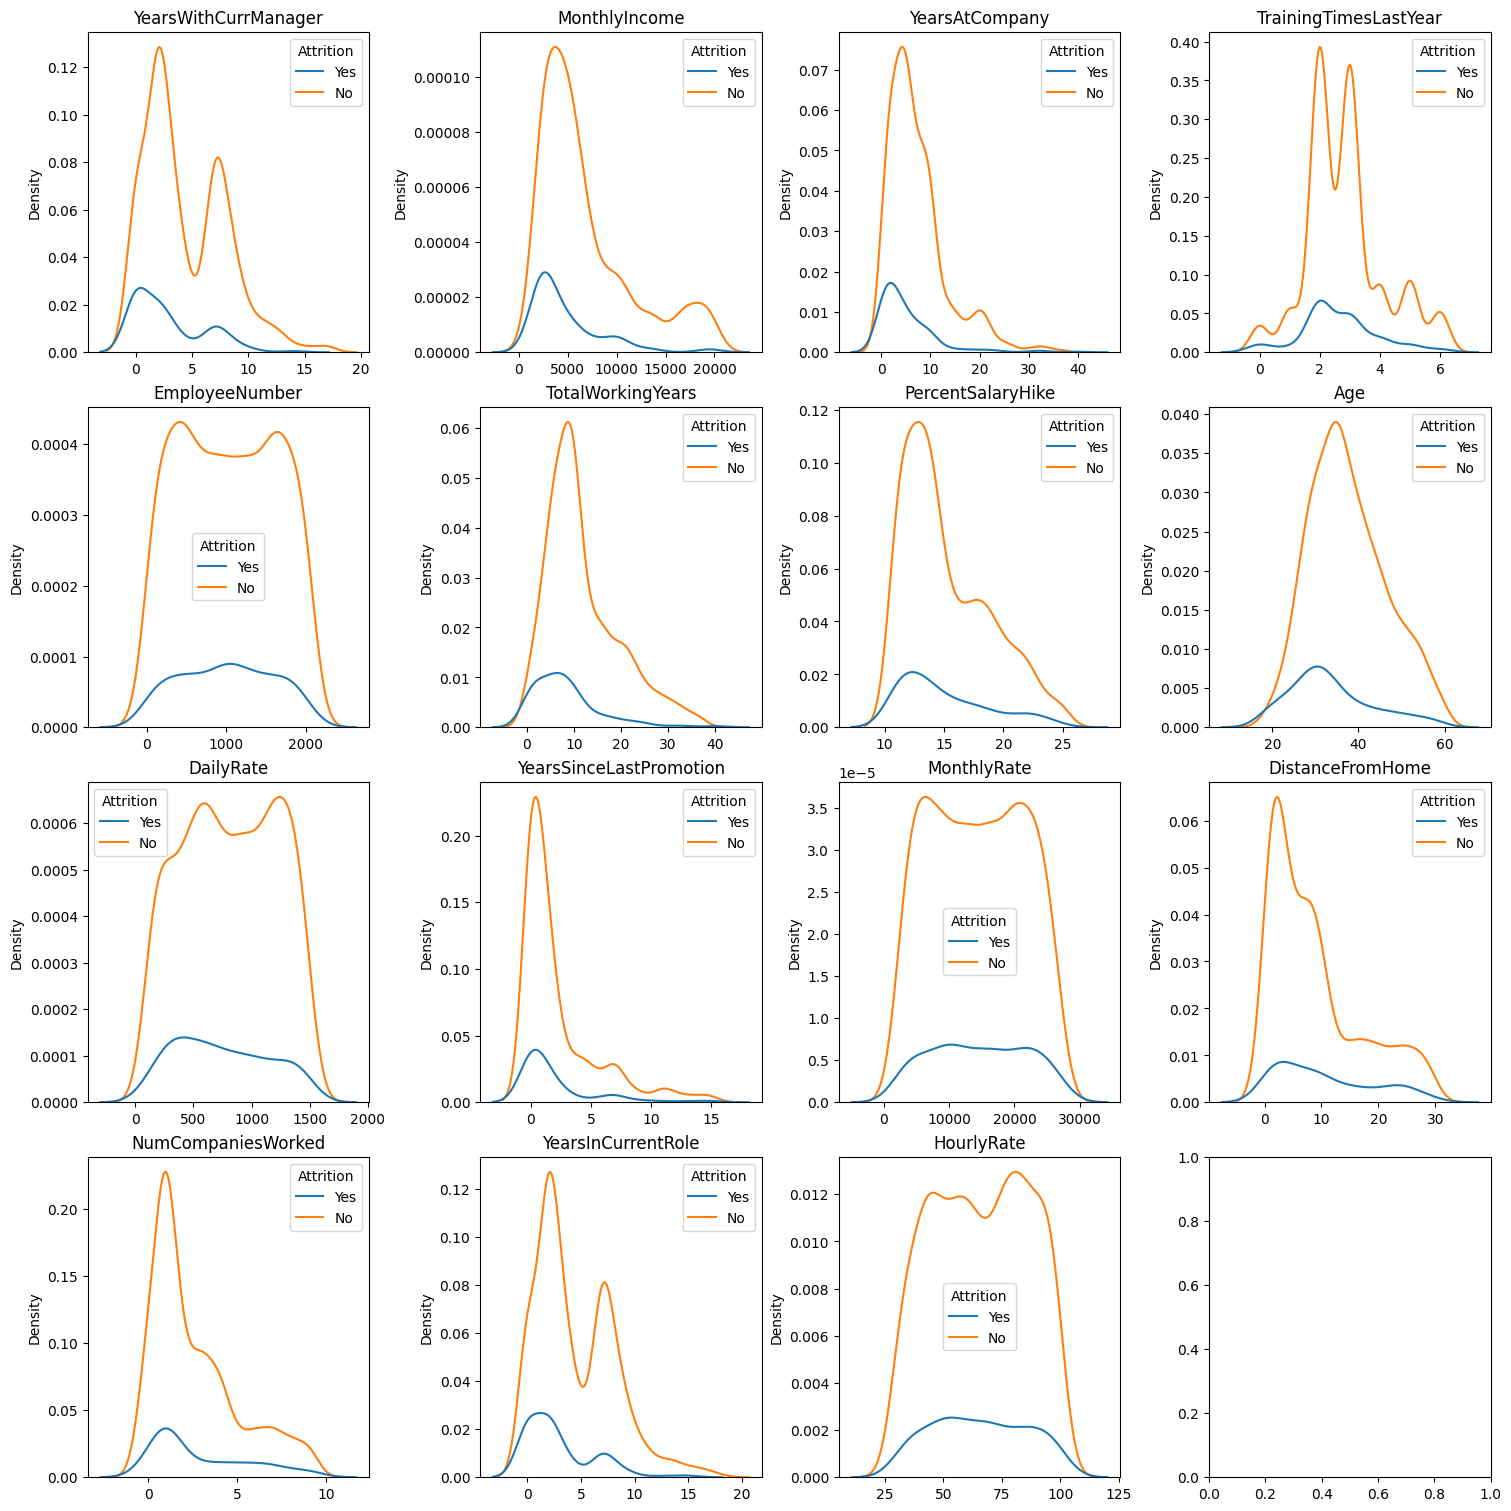

In [95]:
fig, ax = plt.subplots(4,4, figsize=(15,15), constrained_layout=True)
ax = ax.flatten()

for i in range(len(numerical_feats)):
    sns.kdeplot(data=data, x=data[numerical_feats[i]], hue='Attrition', ax=ax[i])
    ax[i].set_title(numerical_feats[i])
    ax[i].set(xlabel=None)
    

# 3. 수치형 변수 간 상관관계 파악

In [9]:
numerical_feats = list(set(data.columns) - set(categorical_feats))
print("수치형 변수 ", len(numerical_feats), "개 :", categorical_feats)

수치형 변수  16 개 : ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']


In [52]:
data_n = data[numerical_feats]
data_n.corr()    # 수치형 변수 간 피어슨 상관계수

,YearsWithCurrManager,MonthlyIncome,YearsAtCompany,TrainingTimesLastYear,EmployeeNumber,TotalWorkingYears,PercentSalaryHike,Age,DailyRate,YearsSinceLastPromotion,MonthlyRate,DistanceFromHome,NumCompaniesWorked,YearsInCurrentRole,HourlyRate
YearsWithCurrManager,1.000000,0.344079,0.769212,-0.004096,-0.009197,0.459188,-0.011985,0.202089,-0.026363,0.510224,-0.036746,0.014406,-0.110319,0.714365,-0.020123
MonthlyIncome,0.344079,1.000000,0.514285,-0.021736,-0.014829,0.772893,-0.027269,0.497855,0.007707,0.344978,0.034814,-0.017014,0.149515,0.363818,-0.015794
YearsAtCompany,0.769212,0.514285,1.000000,0.003569,-0.011240,0.628133,-0.035991,0.311309,-0.034055,0.618409,-0.023655,0.009508,-0.118421,0.758754,-0.019582
TrainingTimesLastYear,-0.004096,-0.021736,0.003569,1.000000,0.023603,-0.035662,-0.005221,-0.019621,0.002453,-0.002067,0.001467,-0.036942,-0.066054,-0.005738,-0.008548
EmployeeNumber,-0.009197,-0.014829,-0.011240,0.023603,1.000000,-0.014365,-0.012944,-0.010145,-0.050990,-0.009019,0.012648,0.032916,-0.001251,-0.008416,0.035179
TotalWorkingYears,0.459188,0.772893,0.628133,-0.035662,-0.014365,1.000000,-0.020608,0.680381,0.014515,0.404858,0.026442,0.004628,0.237639,0.460365,-0.002334
PercentSalaryHike,-0.011985,-0.027269,-0.035991,-0.005221,-0.012944,-0.020608,1.000000,0.003634,0.022704,-0.022154,-0.006429,0.040235,-0.010238,-0.001520,-0.009062
Age,0.202089,0.497855,0.311309,-0.019621,-0.010145,0.680381,0.003634,1.000000,0.010661,0.216513,0.028051,-0.001686,0.299635,0.212901,0.024287
DailyRate,-0.026363,0.007707,-0.034055,0.002453,-0.050990,0.014515,0.022704,0.010661,1.000000,-0.033229,-0.032182,-0.004985,0.038153,0.009932,0.023381
YearsSinceLastPromotion,0.510224,0.344978,0.618409,-0.002067,-0.009019,0.404858,-0.022154,0.216513,-0.033229,1.000000,0.001567,0.010029,-0.036814,0.548056,-0.026716


**피어슨 상관계수 : +1의 경우 완벽한 양의 선형 상관 관계, -1의 경우 완벽한 음의 상관관계, 0의 경우 선형 상관관계를 갖지 않는다.**

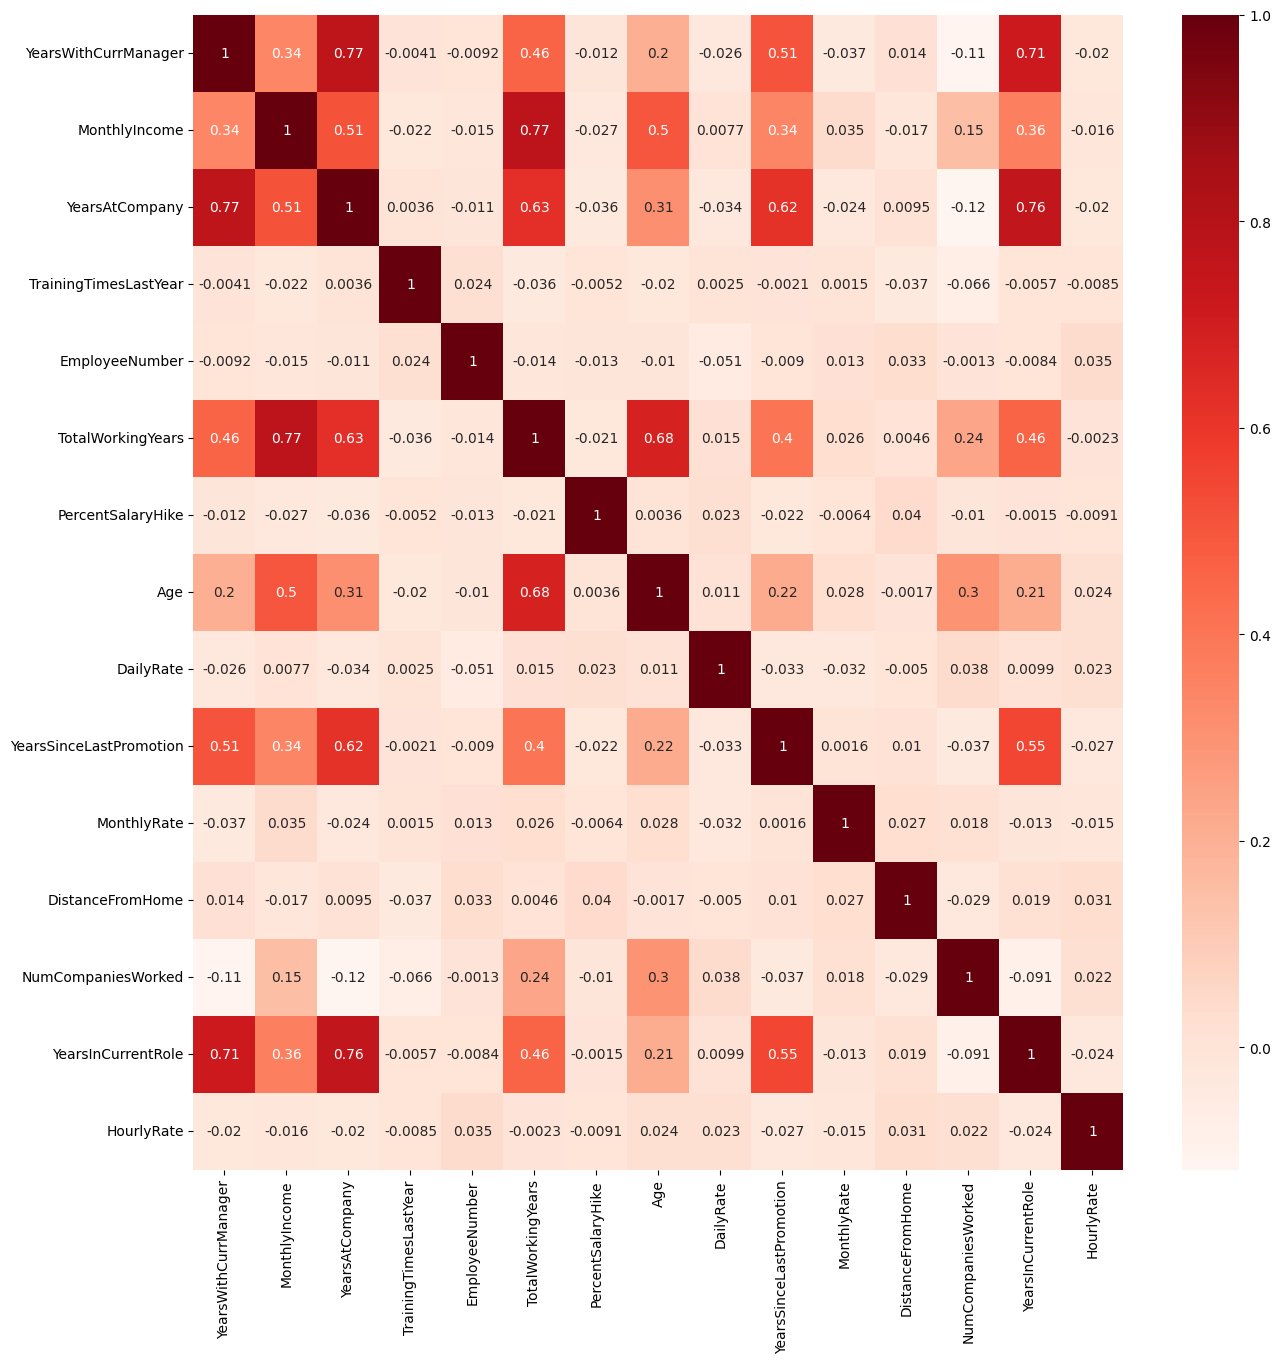

In [53]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(data_n.corr(), annot=True, cmap='Reds')
plt.show()

**피어슨 상관계수가 0.6 이상**
- TotalWorkingYears - MonthlyIncome : 0.77
- TotalWorkingYears - Age : 0.68
- TotalWorkingYears - YearsAtCompany : 0.63
- YearsSinceLastPromotion - YearsAtCompany : 0.62
- YearsAtCompany - YearsIncurrentRole: 0.76
- YearsAtCompany - YearsWithCurrManager : 0.77
- YearsInCurrentRole - YearsWithCurrManager : 0.71

# 4. 파생변수 생성
- binning(구간 분할)으로 파생 변수 생성
 - 대상 칼럼: Age, MonthlyIncome

In [123]:
data['Age_bin'] = pd.cut(data['Age'], # 데이터 배열 
                        bins=[18, 25, 35, 45, 60], #  경계값 리스트
                        labels = ['A','B','C', 'D'], # bin이름
                        include_lowest = True) # 첫 경곗값 포함

print(data['Age_bin'].value_counts(), '\n')
print(data[['Age','Age_bin']].head())

B    606
C    468
D    273
A    123
Name: Age_bin, dtype: int64 

   Age Age_bin
0   41       C
1   49       D
2   37       C
3   33       B
4   27       B


위의 분포 시각화 기준으로 정함

In [126]:
data['MonthlyIncome_bin'] = pd.cut(data['MonthlyIncome'], # 데이터 배열 
                                    bins=[1000, 3000, 5000, 7500, 10000, 15000, 20000], #  경계값 리스트
                                    labels = ['A','B','C', 'D','E','F'], # bin이름
                                    include_lowest = True) # 첫 경곗값 포함


print(data['MonthlyIncome_bin'].value_counts(), '\n')
print(data[['MonthlyIncome', 'MonthlyIncome_bin']].head())

A    395
B    354
C    310
E    148
F    133
D    130
Name: MonthlyIncome_bin, dtype: int64 

   MonthlyIncome MonthlyIncome_bin
0           5993                 C
1           5130                 C
2           2090                 A
3           2909                 A
4           3468                 B
